In [1]:
import torch
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
# Load the DataFrame
art_df = pd.read_excel(r'/content/Art.xlsx')

# Crop the first 20,000 rows from the DataFrame and assign to df1
df1 = art_df.iloc[:20000].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add a new column 'Label' with value 0 for all rows in df1
df1['Label'] = 0

df1 = df1.rename(columns = {'Text':'Content'})

In [3]:
df1 = df1[['Content','Label']]
df1

,Content,Label
0,الدراما المصرية دايمًا فيها مشاهد مؤثرة بتخلين...,0
1,مفيش مسلسل زي مسلسل الاختيار اللي بيجمع بين ال...,0
2,كل ما تشوف مسلسل مصري جديد، تلاقيه دايمًا مليا...,0
3,الدراما المصرية مشهورة بإنها بتعكس الواقع وتطر...,0
4,مسلسل البرنس خلانا كلنا نتأثر بقصة الأخوة والا...,0
...,...,...
19994,يجري حاليا التحضير لتحويل بعض حلقات برنامج الش...,0
19995,شهدت العاصمة الإسماعيلية نهاية الأسبوع المقبل ...,0
19996,مباشرة بعدما ضمن المنتخب الوطني تأهله إلى مناف...,0
19997,مهتمون وإعلاميون طالبوا برصد مزيد من الإمكانيا...,0


In [4]:
# Load the DataFrame
sports_df = pd.read_excel(r'/content/Sports.xlsx')

# Crop the first 20,000 rows from the DataFrame and assign to df1
df2 = sports_df.iloc[:20000].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add a new column 'Label' with value 1 for all rows in df1
df2['Label'] = 1

df2 = df2.rename(columns = {'Text':'Content'})

In [5]:
df2 = df2[['Content','Label']]
df2

,Content,Label
0,الأهلي دايمًا في القمة، مفيش فريق يقدر ينافسه ...,1
1,زمالك وأهلي.. الدوري السنة دي مولع، بس الأهم ا...,1
2,ماتش الأهلي والزمالك الجاي هيكون النهائي الحقي...,1
3,ليه جمهور الزمالك دايمًا واثق رغم الصعوبات؟ ده...,1
4,ماتشات الدوري المصري السنة دي مستواها عالي جدً...,1
...,...,...
19995,دافع فوزي لقجع المرشح لرئاسة جامعة كرة القدم ع...,1
19996,اعتبرت الأغلى هذا الموسم وجمهور الفريق السعودي...,1
19997,يواجه الجيش الملكي للكرة الطائرة فريق الأهلي ا...,1
19998,رينار يستدعي الرحيلي من مولدافيا وبلهندة مهدد ...,1


In [6]:
# Load the DataFrame
politics_df = pd.read_excel('/content/Politics.xlsx')

# Crop the first 20,000 rows from the DataFrame and assign to df1
df3 = politics_df.iloc[:20000].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add a new column 'Label' with value 2 for all rows in df1
df3['Label'] = 2

df3 = df3.rename(columns = {'Text':'Content'})

In [7]:
df3 = df3[['Content','Label']]
df3

,Content,Label
0,السيسي مهتم جداً بتطوير الطرق والكباري.,2
1,المونوريل ده من أكتر المشاريع اللي الناس مبسوط...,2
2,العاصمة الإدارية الجديدة حاجة عظمة بصراحة.,2
3,في كذا مشروع للإسكان الاجتماعي اتعمل في عهد ال...,2
4,شفتي طريق السويس الجديد؟ خلصوه بسرعة!,2
...,...,...
19995,بات البلوكاج الحكومي يثير تساؤلات مختلف أطياف ...,2
19996,في أول لقاء لرئيس الحكومة المعين سعد العثماني ...,2
19997,قال وزير التعليم العالي والبحث العلمي وتكوين ا...,2
19998,ثم حزب الاتحاد الاشتراكي للقوات الشعبية نتائج ...,2


In [8]:
# Load the DataFrame
religion_df = pd.read_excel('/content/Religion.xlsx')

# Crop the first 20,000 rows from the DataFrame and assign to df1
df4 = religion_df.iloc[:20000].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add a new column 'Label' with value 2 for all rows in df1
df4['Label'] = 3

df4 = df4.rename(columns = {'Text':'Content'})

In [9]:
df4 = df4[['Content','Label']]
df4

,Content,Label
0,الحمد لله انا حفيد الشيخ محمد الغزالى أديب الد...,3
1,واكتب فى دين الله من خلال الاحاديث والقرأن,3
2,ولكنى ابسطها باللغه العاميه المصريه وهذه سلسله...,3
3,السلسله بعنوان ( يوم الحساب ),3
4,يا عم كلنا هنموت,3
...,...,...
19995,[158] كما أهدى نعشًا رخاميًا للضريح إلا أن جثم...,3
19996,وبقي في النعش الخشبي,3
19997,وذلك لأن الإسلام يُحّرم نبش القبور وإخراج الأم...,3
19998,لهذا بقي النعش الهدية في الضريح خاويًا إلى اليوم,3


In [10]:
# # Load the DataFrame
# art_df = pd.read_excel(r'/content/Science.xlsx')

# # Crop the first 20,000 rows from the DataFrame and assign to df1
# df4 = art_df.iloc[:20000].copy()  # Use .copy() to avoid SettingWithCopyWarning

# # Add a new column 'Label' with value 3 for all rows in df1
# df4['Label'] = 3

# df4 = df4.rename(columns = {'Text':'Content'})

In [11]:
# df4 = df4[['Content','Label']]
# df4

In [12]:
# Merge the cropped DataFrames (by default, it concatenates rows)
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
merged_df

,Content,Label
0,الدراما المصرية دايمًا فيها مشاهد مؤثرة بتخلين...,0
1,مفيش مسلسل زي مسلسل الاختيار اللي بيجمع بين ال...,0
2,كل ما تشوف مسلسل مصري جديد، تلاقيه دايمًا مليا...,0
3,الدراما المصرية مشهورة بإنها بتعكس الواقع وتطر...,0
4,مسلسل البرنس خلانا كلنا نتأثر بقصة الأخوة والا...,0
...,...,...
79994,[158] كما أهدى نعشًا رخاميًا للضريح إلا أن جثم...,3
79995,وبقي في النعش الخشبي,3
79996,وذلك لأن الإسلام يُحّرم نبش القبور وإخراج الأم...,3
79997,لهذا بقي النعش الهدية في الضريح خاويًا إلى اليوم,3


In [13]:
# Assuming your CSV file has columns 'text' and 'label'
data = list(zip(merged_df['Content'].astype(str),merged_df['Label'].astype(str)))  # Ensure the 'text' and 'label' columns are treated as strings

In [14]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [15]:
# Define a custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, label = self.data[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(int(label))  # Assuming labels are integers representing the class index
        }

In [16]:
# Load the BERT base tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')  # Or 'bert-base-uncased'
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from torch.utils.data import DataLoader

# Create the datasets
train_dataset = SentimentDataset(train_data, tokenizer)
test_dataset = SentimentDataset(test_data, tokenizer)

# Create the data loaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [18]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [19]:
# Training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

In [20]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'label'}
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Get model predictions
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)

    # Print loss and accuracy
    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Average Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

Epoch 1/3: 100%|██████████| 7000/7000 [25:30<00:00,  4.57it/s]


Epoch 1/3 - Average Loss: 0.1384 - Accuracy: 0.9571


Epoch 2/3: 100%|██████████| 7000/7000 [25:32<00:00,  4.57it/s]


Epoch 2/3 - Average Loss: 0.0668 - Accuracy: 0.9802


Epoch 3/3: 100%|██████████| 7000/7000 [25:31<00:00,  4.57it/s]

Epoch 3/3 - Average Loss: 0.0482 - Accuracy: 0.9862


In [21]:
# Evaluation
model.eval()
predictions, true_labels = [], []
for batch in tqdm(test_dataloader, desc='Evaluating'):
    inputs = {key: val.to(device) for key, val in batch.items() if key != 'label'}
    labels = batch['label'].to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

Evaluating: 100%|██████████| 3000/3000 [02:53<00:00, 17.31it/s]


In [22]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9839


In [23]:
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predictions)
class_report = classification_report(true_labels, predictions)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[5795   58   37   36]
 [  41 5981   35   22]
 [  60    5 5902    7]
 [  29   14   43 5935]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5926
           1       0.99      0.98      0.99      6079
           2       0.98      0.99      0.98      5974
           3       0.99      0.99      0.99      6021

    accuracy                           0.98     24000
   macro avg       0.98      0.98      0.98     24000
weighted avg       0.98      0.98      0.98     24000



Testing Dataset Label Distribution:
1    6079
3    6021
2    5974
0    5926
Name: count, dtype: int64
True: 2, Predicted: 2
True: 2, Predicted: 2
True: 3, Predicted: 3
True: 2, Predicted: 2
True: 2, Predicted: 2
True: 0, Predicted: 0
True: 3, Predicted: 3
True: 3, Predicted: 3
True: 1, Predicted: 1
True: 2, Predicted: 2


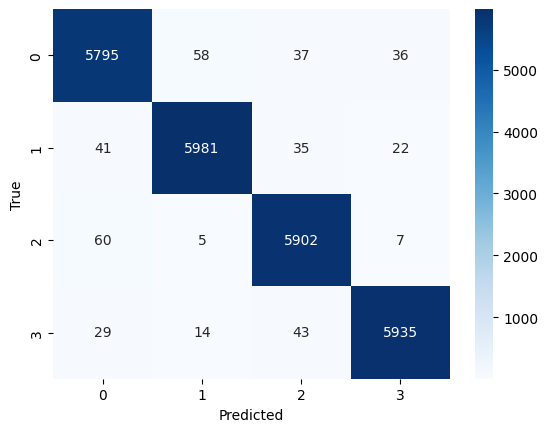

In [24]:
# Print the distribution of labels in the testing dataset
print("Testing Dataset Label Distribution:")
print(pd.Series(true_labels).value_counts())

# Print true labels and predicted labels for a small sample
for true, pred in zip(true_labels[:10], predictions[:10]):
    print(f"True: {true}, Predicted: {pred}")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Save model locally in Colab
model.save_pretrained('/content/art_sports_politics_and_religion_classification_model')
tokenizer.save_pretrained('/content/tokenizer')

('/content/tokenizer/tokenizer_config.json',
 '/content/tokenizer/special_tokens_map.json',
 '/content/tokenizer/vocab.txt',
 '/content/tokenizer/added_tokens.json',
 '/content/tokenizer/tokenizer.json')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import shutil

# Define the path to the file and the destination in Google Drive
file_path = '/content/art_sports_politics_and_religion_classification_model/model.safetensors'
destination_folder = '/content/drive/MyDrive/Art Sports Politics Religion Classification'

# Copy the file to the destination folder in Google Drive
shutil.copy(file_path, destination_folder)

'/content/drive/MyDrive/Art Sports Politics Religion Classification/model.safetensors'